## Importing libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Loading dataset

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


## Visualizations

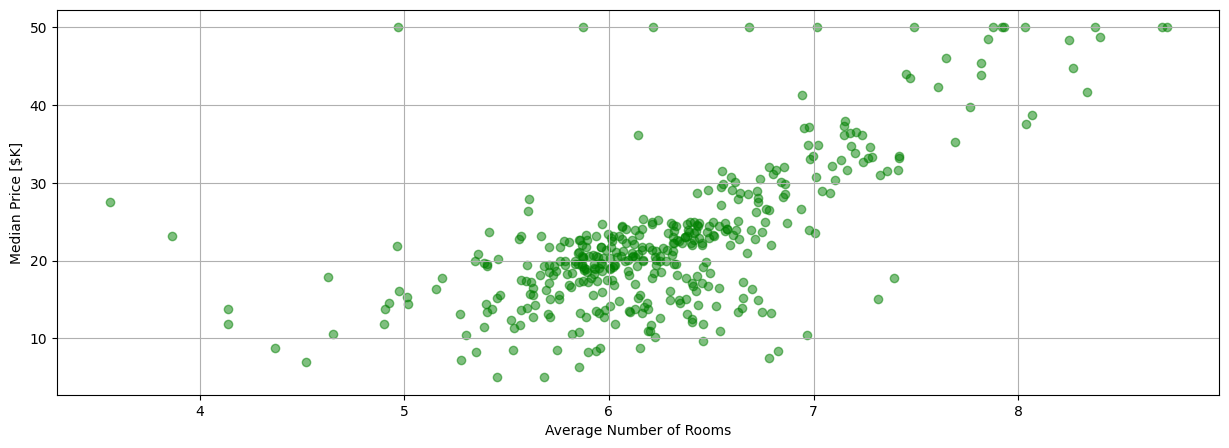

In [5]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

In [6]:
model = Sequential()
 
# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))
 
# Display a summary of the model architecture.
model.summary()

C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

## Model Fitting

In [8]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=101, 
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 182.6870 - val_loss: 253.3540
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164.9781 - val_loss: 236.6098
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.8995 - val_loss: 221.2491
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 139.9140 - val_loss: 206.7961
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.7642 - val_loss: 193.1833
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.4104 - val_loss: 180.3988
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.8423 - val_loss: 168.4382
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.0528 - val_loss: 157.2980
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92.0345 - val_loss: 146.9743
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.7783 - val_loss: 137.4621
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.2730 - val_loss: 128.7555
Epoch 12/101
18/18 ━

## Validation

In [11]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

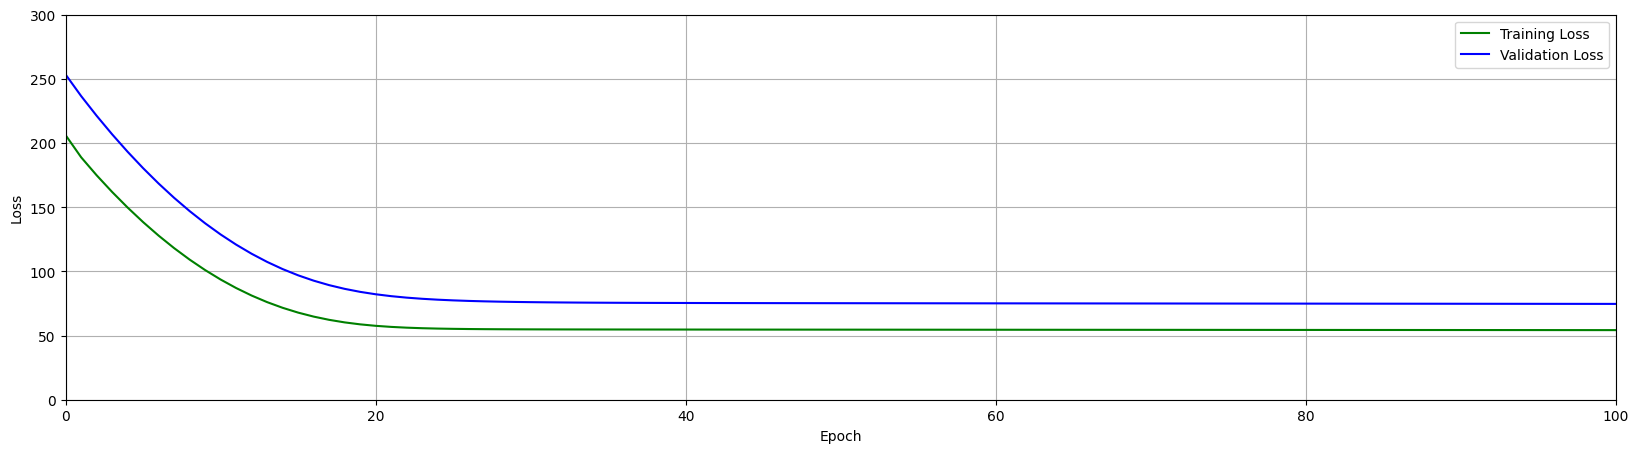

In [12]:
plot_loss(history)

## Prediction

In [13]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

ValueError: Unrecognized data type: x=[3, 4, 5, 6, 7] (of type <class 'list'>)

In [176]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 21ms/step


## Conclusion

In [177]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

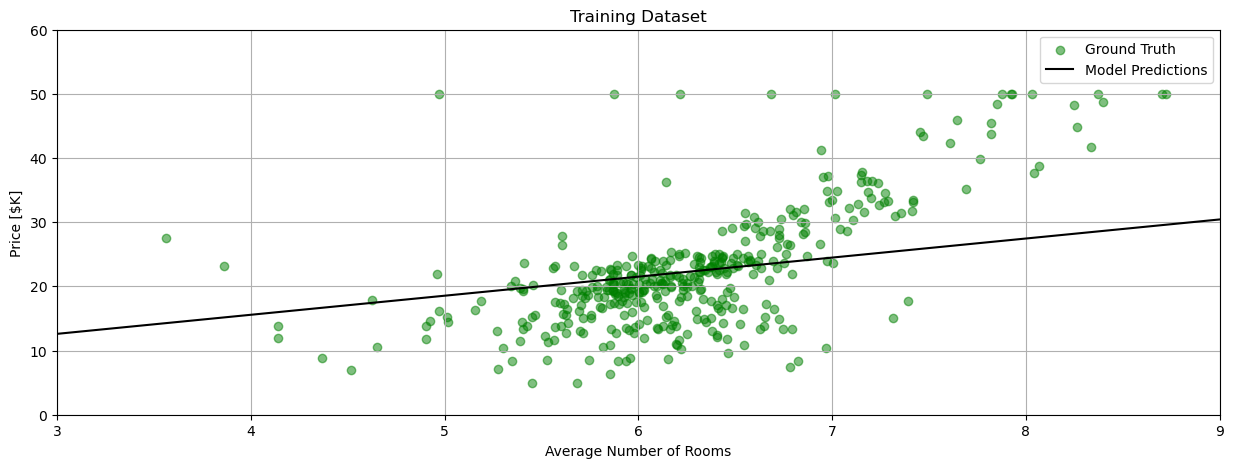

In [178]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

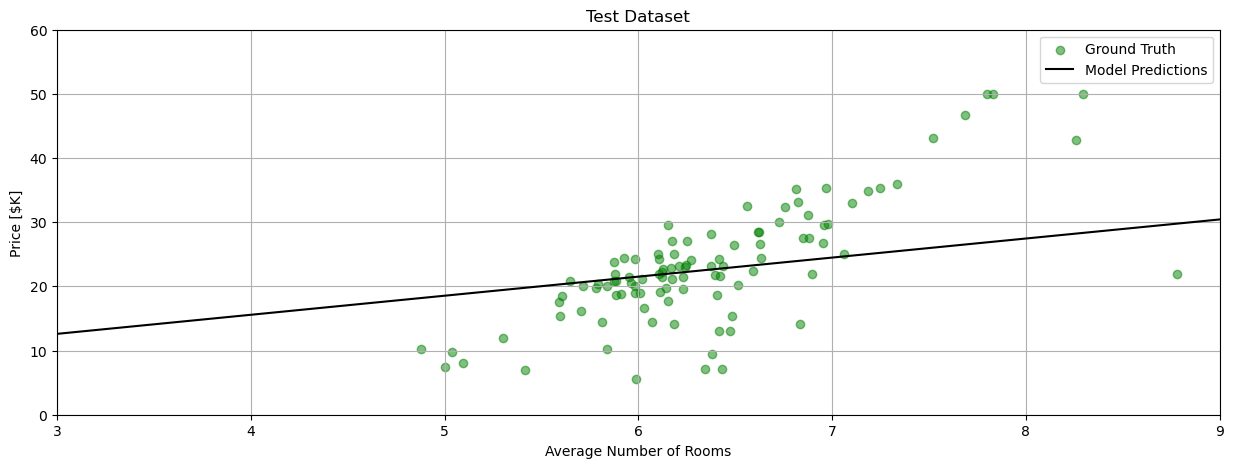

In [179]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')